In [109]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [110]:
df = pd.read_csv("sample.csv")

In [111]:
df.columns

Index(['ad_id', 'platform', 'ad_type', 'industry', 'campaign_objective',
       'target_audience_age_min', 'target_audience_age_max',
       'target_audience_gender', 'target_audience_job_titles',
       'target_audience_interests', 'duration_seconds', 'aspect_ratio',
       'brightness_score', 'color_palette_primary', 'color_palette_secondary',
       'color_palette_tertiary', 'text_to_image_ratio', 'font_count',
       'logo_size_ratio', 'logo_position', 'has_human_face', 'face_count',
       'sentiment_score', 'word_count', 'has_cta', 'cta_type', 'audio_present',
       'music_tempo', 'speech_pace', 'impressions', 'clicks', 'ctr',
       'conversions', 'conversion_rate', 'cpa', 'roi', 'engagement_rate',
       'watch_time', 'watch_percentage', 'budget', 'duration_days',
       'start_date', 'geographic_targeting'],
      dtype='object')

In [112]:
df.head()

,ad_id,platform,ad_type,industry,campaign_objective,target_audience_age_min,target_audience_age_max,target_audience_gender,target_audience_job_titles,target_audience_interests,...,conversion_rate,cpa,roi,engagement_rate,watch_time,watch_percentage,budget,duration_days,start_date,geographic_targeting
0,A1001,Meta,Image,Retail,Conversion,25,44,female,NaN,NaN,...,0.0756,22.45,2.4,0.0315,NaN,NaN,100,7,2024-01-15,"US-CA,US-NY,US-FL"
1,A1002,TikTok,Video,Beauty,Consideration,18,34,all,NaN,NaN,...,0.0316,14.85,3.2,0.0846,13.2,0.47,200,14,2024-02-03,global
2,A1003,LinkedIn,Image,B2B Technology,Lead Generation,28,55,all,"Director,VP,C-Suite",NaN,...,0.0836,87.50,2.1,0.0186,NaN,NaN,300,21,2024-01-22,"US,UK,CA,AU"
3,A1004,YouTube,Video,Entertainment,Awareness,18,65,all,NaN,"movies,streaming",...,0.0428,3.85,8.4,0.0324,12.8,0.85,500,30,2024-02-10,"US,CA"
4,A1005,Meta,Carousel,E-commerce,Conversion,22,45,all,NaN,NaN,...,0.0870,12.75,3.8,0.0467,NaN,NaN,150,14,2024-01-05,"US-West,US-Midwest"


## Handling missing values

In [113]:
df.columns[df.isna().any()].tolist() ## Check which columns have missing values


['target_audience_job_titles',
 'target_audience_interests',
 'music_tempo',
 'speech_pace',
 'watch_time',
 'watch_percentage']

In [114]:
df_sum_na = df.isna().sum() ## Check how many missing values are in each column
df_sum_na[df_sum_na > 0]

target_audience_job_titles    35
target_audience_interests     38
music_tempo                   24
speech_pace                   24
watch_time                    24
watch_percentage              24
dtype: int64

In [115]:
df.loc[df['target_audience_job_titles'].isna(), 'target_audience_job_titles'] = "all"
df.loc[df['target_audience_interests'].isna(), 'target_audience_interests'] = "all"

In [116]:
df['ad_type'].value_counts()

ad_type
Video       22
Image       16
Carousel     8
Story        4
Name: count, dtype: int64

In [117]:
print("Music Tempo NaN values by ad type:")
print(df.loc[df['music_tempo'].isna()]['ad_type'].value_counts())
print("\n==========================")

print("\nSpeech Pace NaN values by ad type:")
print(df.loc[df['speech_pace'].isna()]['ad_type'].value_counts())
print("\n==========================")

print("\nWatch Time NaN values by ad type:")
print(df.loc[df['watch_time'].isna()]['ad_type'].value_counts())
print("\n==========================")

print("\nWatch Percentage NaN values by ad type:")
print(df.loc[df['watch_percentage'].isna()]['ad_type'].value_counts())
print("\n==========================")

Music Tempo NaN values by ad type:
ad_type
Image       16
Carousel     8
Name: count, dtype: int64


Speech Pace NaN values by ad type:
ad_type
Image       16
Carousel     8
Name: count, dtype: int64


Watch Time NaN values by ad type:
ad_type
Image       16
Carousel     8
Name: count, dtype: int64


Watch Percentage NaN values by ad type:
ad_type
Image       16
Carousel     8
Name: count, dtype: int64



In [118]:
# Fill missing values for audio/video ad types with 0
# Maybe I could use the mean or median of the column instead, but for now, I will just fill with 0

df.fillna({'music_tempo': 0, 'speech_pace': 0, 'watch_time': 0, 'watch_percentage': 0}, inplace=True)

## Handling inconsistencies

In [119]:
## There is no value in the column 'target_audience_gender' that is 'male'

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ad_id                       50 non-null     object 
 1   platform                    50 non-null     object 
 2   ad_type                     50 non-null     object 
 3   industry                    50 non-null     object 
 4   campaign_objective          50 non-null     object 
 5   target_audience_age_min     50 non-null     int64  
 6   target_audience_age_max     50 non-null     int64  
 7   target_audience_gender      50 non-null     object 
 8   target_audience_job_titles  50 non-null     object 
 9   target_audience_interests   50 non-null     object 
 10  duration_seconds            50 non-null     int64  
 11  aspect_ratio                50 non-null     object 
 12  brightness_score            50 non-null     int64  
 13  color_palette_primary       50 non-nu

In [121]:
## Check if the duration_seconds is consistent with the ad_type
df.loc[df['ad_type'].isin(['Video', 'Story']), ['ad_type', 'duration_seconds']]

,ad_type,duration_seconds
1,Video,28
3,Video,15
5,Video,12
7,Video,30
8,Story,15
9,Video,24
11,Video,45
13,Video,15
15,Video,20
16,Video,35


In [122]:
## Check if the duration_seconds is consistent with the ad_type
## Image and text ads should have a duration of 0 seconds
df.loc[~df['ad_type'].isin(['Video', 'Story']), ['ad_type', 'duration_seconds']]

,ad_type,duration_seconds
0,Image,0
2,Image,0
4,Carousel,0
6,Image,0
10,Image,0
12,Image,0
14,Carousel,0
18,Image,0
19,Carousel,0
20,Image,0


In [123]:
df.loc[(df['has_human_face'] == True) & (df['face_count'] == 0), ['has_human_face', 'face_count']] # There is one ad with a human face, but the face_count is 0

,has_human_face,face_count
33,True,0


In [124]:
df.loc[(df['has_human_face'] == True) & (df['face_count'] == 0), 'face_count'] = 1 # Set face_count to 1 to handle the inconsistency

In [125]:
df.loc[(df['has_human_face'] == False) & (df['face_count'] != 0), ['has_human_face', 'face_count']] # Check if there are any ads without a human face, but the face_count is not 0

,has_human_face,face_count


In [126]:
df.loc[(df['audio_present'] == True) & (df['ad_type'].isin(['Image', 'Carousel'])), ['audio_present', 'ad_type']] # Check if there are any ads with audio present, but the ad_type is not video or story

,audio_present,ad_type


## Handling outliers

In [127]:
import numpy as np

## Outlier detection using IQR method

def iqr_outlier_detection(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numeric_columns = df.select_dtypes(include=[np.number]).columns
outliers_dict = {col: iqr_outlier_detection(col) for col in numeric_columns}
outlier_counts = {col: len(outliers_dict[col]) for col in outliers_dict if len(outliers_dict[col]) > 0}


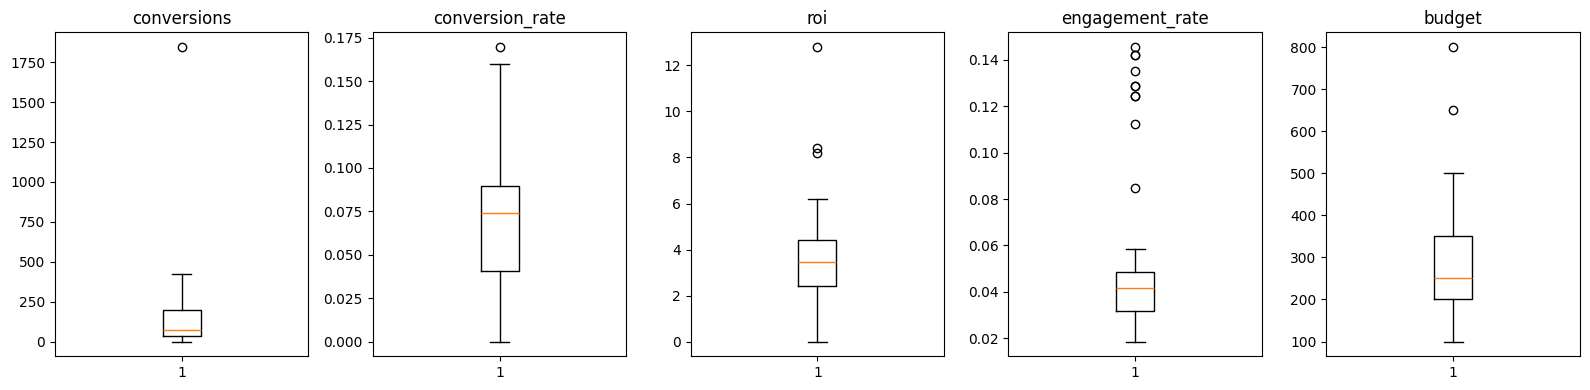

In [128]:
## It's possible to visualize the outliers using boxplots
data = [df['conversions'], df['conversion_rate'], df['roi'], df['engagement_rate'], df['budget']]
fig, axs = plt.subplots(1, 5, figsize=(16, 4))  # 1 linha, 4 colunas

for i, ax in enumerate(axs):
    ax.boxplot(data[i])
    ax.set_title(f'{data[i].name}');
    # ax.grid(True)

plt.tight_layout()
plt.show()

In [129]:
outlier_counts
## In the dataset domain, those outliers means a very successful ad, so I'm not exactly sure if I should remove them or not
## Perhaps I could use them as feature engineering

{'conversions': 1,
 'conversion_rate': 1,
 'roi': 3,
 'engagement_rate': 10,
 'budget': 2}

In [130]:
outliers_dict['conversions']

,ad_id,platform,ad_type,industry,campaign_objective,target_audience_age_min,target_audience_age_max,target_audience_gender,target_audience_job_titles,target_audience_interests,...,conversion_rate,cpa,roi,engagement_rate,watch_time,watch_percentage,budget,duration_days,start_date,geographic_targeting
13,A1014,TikTok,Video,Gaming,App Install,16,35,all,all,"gaming,esports",...,0.1481,2.45,8.2,0.1422,10.8,0.72,400,7,2024-02-18,"US,UK,CA,AU,DE,FR"


In [131]:
outliers_dict['conversion_rate']

,ad_id,platform,ad_type,industry,campaign_objective,target_audience_age_min,target_audience_age_max,target_audience_gender,target_audience_job_titles,target_audience_interests,...,conversion_rate,cpa,roi,engagement_rate,watch_time,watch_percentage,budget,duration_days,start_date,geographic_targeting
10,A1011,LinkedIn,Image,Education,Lead Generation,22,50,all,"Professional,Manager",all,...,0.1696,45.75,4.2,0.0286,0.0,0.0,250,30,2024-01-10,Global


In [132]:
outliers_dict['roi']

,ad_id,platform,ad_type,industry,campaign_objective,target_audience_age_min,target_audience_age_max,target_audience_gender,target_audience_job_titles,target_audience_interests,...,conversion_rate,cpa,roi,engagement_rate,watch_time,watch_percentage,budget,duration_days,start_date,geographic_targeting
3,A1004,YouTube,Video,Entertainment,Awareness,18,65,all,all,"movies,streaming",...,0.0428,3.85,8.4,0.0324,12.8,0.85,500,30,2024-02-10,"US,CA"
7,A1008,YouTube,Video,Automotive,Consideration,25,55,all,all,"cars,luxury",...,0.0147,124.50,12.8,0.0342,23.5,0.78,800,21,2024-02-08,"US,DE,UK,FR,IT"
13,A1014,TikTok,Video,Gaming,App Install,16,35,all,all,"gaming,esports",...,0.1481,2.45,8.2,0.1422,10.8,0.72,400,7,2024-02-18,"US,UK,CA,AU,DE,FR"


In [133]:
outliers_dict['engagement_rate']

,ad_id,platform,ad_type,industry,campaign_objective,target_audience_age_min,target_audience_age_max,target_audience_gender,target_audience_job_titles,target_audience_interests,...,conversion_rate,cpa,roi,engagement_rate,watch_time,watch_percentage,budget,duration_days,start_date,geographic_targeting
1,A1002,TikTok,Video,Beauty,Consideration,18,34,all,all,all,...,0.0316,14.85,3.2,0.0846,13.2,0.47,200,14,2024-02-03,global
5,A1006,TikTok,Video,Fashion,Consideration,16,28,female,all,all,...,0.0436,8.45,4.2,0.1245,8.4,0.70,250,10,2024-02-15,"US,UK,AU,CA"
9,A1010,TikTok,Video,Fitness,Conversion,18,38,all,all,"fitness,health,wellness",...,0.0416,10.25,5.4,0.1124,15.6,0.65,300,14,2024-02-12,"US,UK,AU,CA"
13,A1014,TikTok,Video,Gaming,App Install,16,35,all,all,"gaming,esports",...,0.1481,2.45,8.2,0.1422,10.8,0.72,400,7,2024-02-18,"US,UK,CA,AU,DE,FR"
17,A1018,TikTok,Story,Cosmetics,Awareness,16,40,female,all,all,...,0.0519,7.85,5.8,0.1288,7.2,0.72,220,12,2024-01-28,"US,UK,FR,IT,ES"
25,A1026,TikTok,Video,Beauty,Conversion,16,32,female,all,all,...,0.0519,7.85,5.4,0.1245,12.5,0.69,280,12,2024-01-10,"US,UK,CA,AU"
26,A1027,TikTok,Video,Beauty,Conversion,18,35,female,all,all,...,0.0501,8.25,4.8,0.1352,10.8,0.72,240,10,2024-01-25,"US,UK,AU,FR"
27,A1028,TikTok,Video,Beauty,Awareness,16,30,female,all,all,...,0.0000,0.00,0.0,0.1455,14.5,0.66,200,15,2024-02-01,"US,UK,CA,AU,NZ"
28,A1029,TikTok,Story,Beauty,Consideration,18,32,female,all,all,...,0.0442,9.65,4.2,0.1288,5.2,0.65,180,7,2024-01-20,"US,UK,CA,AU"
29,A1030,TikTok,Video,Beauty,Conversion,16,28,female,all,all,...,0.0497,6.85,5.8,0.1422,13.5,0.68,320,14,2024-01-15,"US,UK,FR,IT,ES"


In [134]:
outliers_dict['budget']

,ad_id,platform,ad_type,industry,campaign_objective,target_audience_age_min,target_audience_age_max,target_audience_gender,target_audience_job_titles,target_audience_interests,...,conversion_rate,cpa,roi,engagement_rate,watch_time,watch_percentage,budget,duration_days,start_date,geographic_targeting
7,A1008,YouTube,Video,Automotive,Consideration,25,55,all,all,"cars,luxury",...,0.0147,124.5,12.8,0.0342,23.5,0.78,800,21,2024-02-08,"US,DE,UK,FR,IT"
11,A1012,YouTube,Video,Travel,Consideration,25,65,all,all,"travel,adventure,luxury",...,0.0200,85.4,6.2,0.0485,32.5,0.72,650,21,2024-02-05,"US,UK,CA,AU,NZ,SG"


In [135]:
## Some rows have more than one outlier, maybe they are highly successful ads (A1008, A1014)

In [136]:
df.to_csv("sample_treated.csv", index=False)

## Visual Representations

Text(0, 0.5, 'ROI')

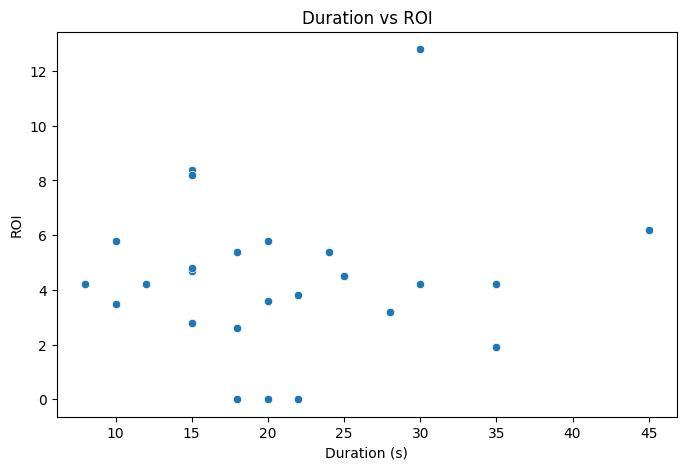

In [137]:
# Performance columns: impressions, clicks, ctr, conversions, conversion_rate, cpa, roi, engagement_rate, watch_time, watch_percentage

import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(data=df.loc[df['ad_type'].isin(['Video', 'Story'])], x='duration_seconds', y='roi')
plt.title("Duration vs ROI")
plt.xlabel("Duration (s)")
plt.ylabel("ROI")

# The points are very scattered, so I don't think there is a strong correlation between duration and ROI

Text(0, 0.5, 'Watch Percentage')

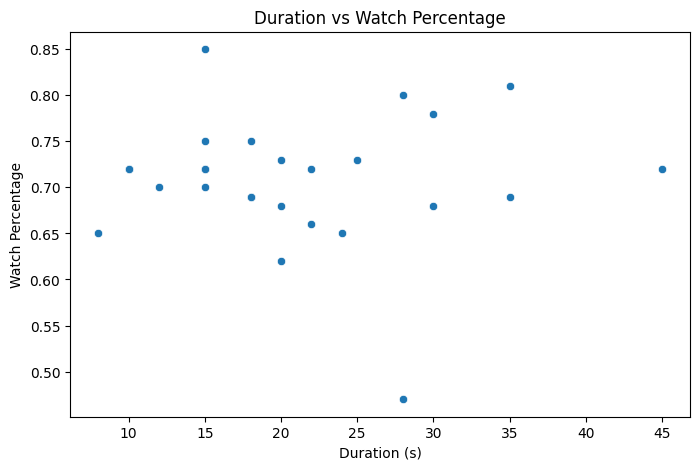

In [138]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=df.loc[df['ad_type'].isin(['Video', 'Story'])], x='duration_seconds', y='watch_percentage')
plt.title("Duration vs Watch Percentage")
plt.xlabel("Duration (s)")
plt.ylabel("Watch Percentage")

# The points are pretty balanced

Text(0, 0.5, 'CTR')

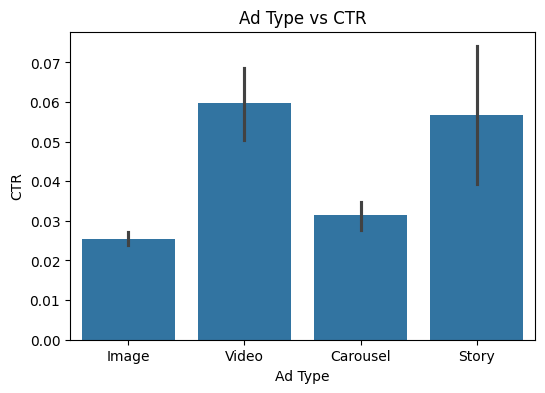

In [139]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='ad_type', y='ctr')
plt.title("Ad Type vs CTR")
plt.xlabel("Ad Type")
plt.ylabel("CTR")

# Video and Story ads have a higher Click-Through Rate (CTR) than Image and Carousel ads

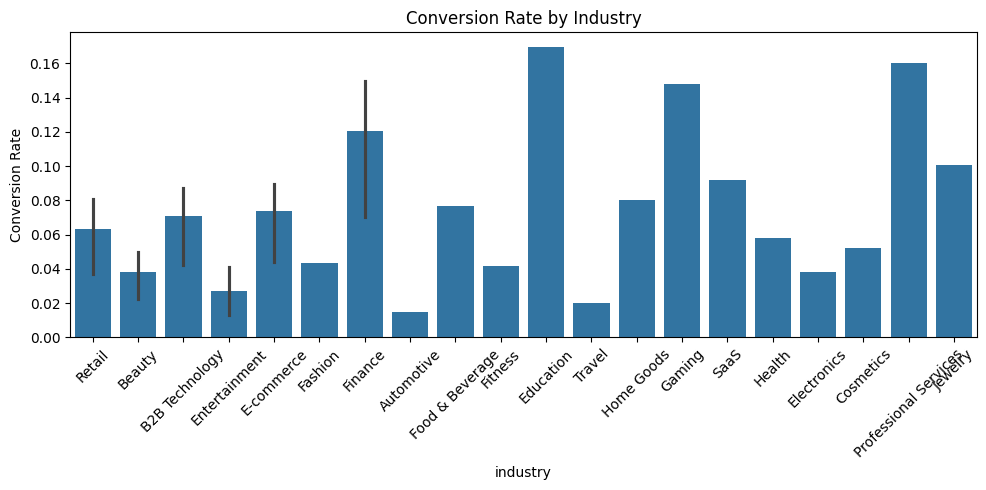

In [140]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='industry', y='conversion_rate')
plt.title("Conversion Rate by Industry")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.tight_layout()

## Education, Gaming and Professional Services have the highest conversion rates, while Travel and Real Estate have the lowest conversion rates
## Finance is also high, but with a higher variation

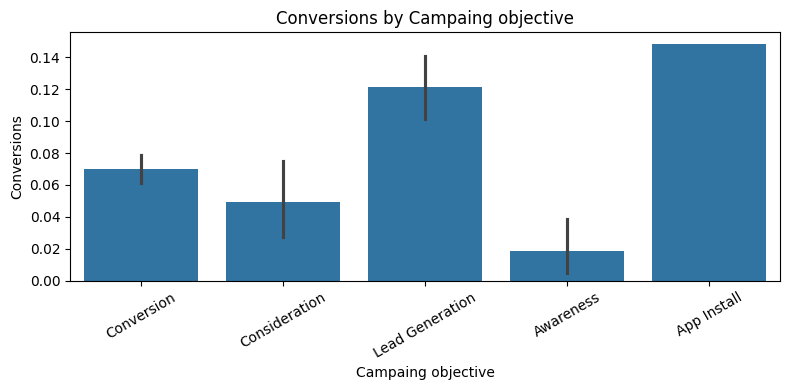

In [141]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='campaign_objective', y='conversion_rate')
plt.title("Conversions by Campaing objective")
plt.xlabel("Campaing objective")
plt.ylabel("Conversions")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

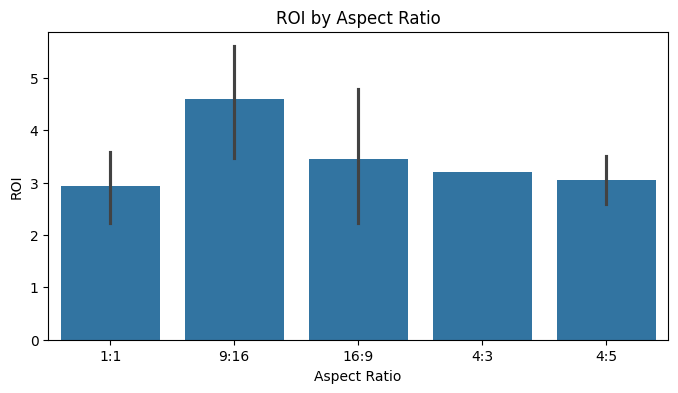

In [142]:
## The ROI is balanced across the Aspect Ratios

plt.figure(figsize=(8,4))
sns.barplot(data=df, x='aspect_ratio', y='roi')
plt.title("ROI by Aspect Ratio")
plt.xlabel("Aspect Ratio")
plt.ylabel("ROI")
plt.show()

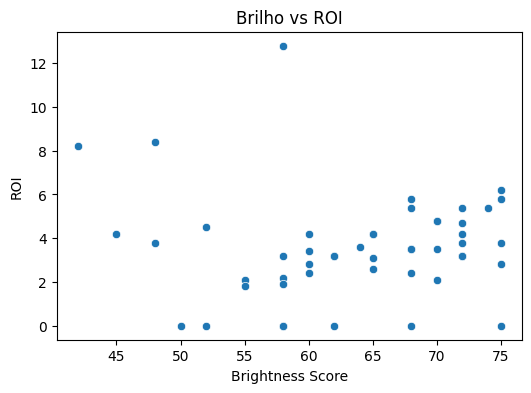

In [143]:
## Weak and positive correlation between brightness score and ROI
## Also, noticed that the most ads have a higher brightness

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='brightness_score', y='roi')
plt.title("Brilho vs ROI")
plt.xlabel("Brightness Score")
plt.ylabel("ROI")
plt.show()

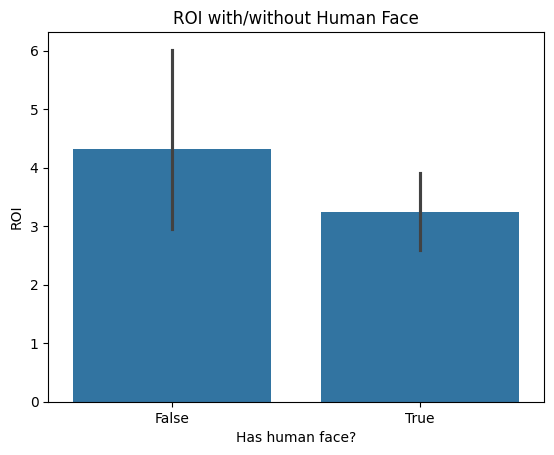

In [144]:
sns.barplot(data=df, x='has_human_face', y='roi')
plt.title("ROI with/without Human Face")
plt.xlabel("Has human face?")
plt.ylabel("ROI")
plt.show()

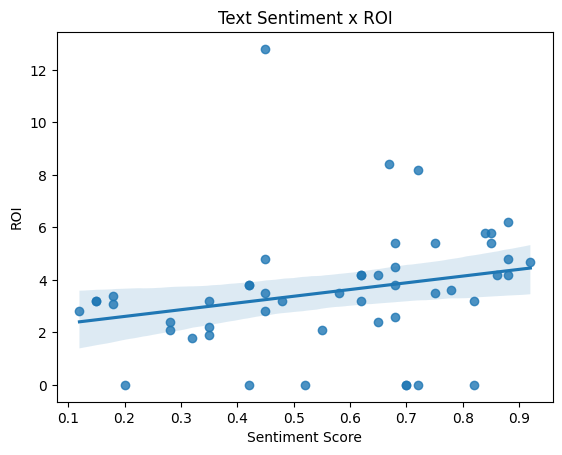

In [145]:
## Shows that the sentiment_score and ROI have a weak positive correlation

sns.regplot(data=df, x='sentiment_score', y='roi')
plt.title("Text Sentiment x ROI")
plt.xlabel("Sentiment Score")
plt.ylabel("ROI")
plt.show()

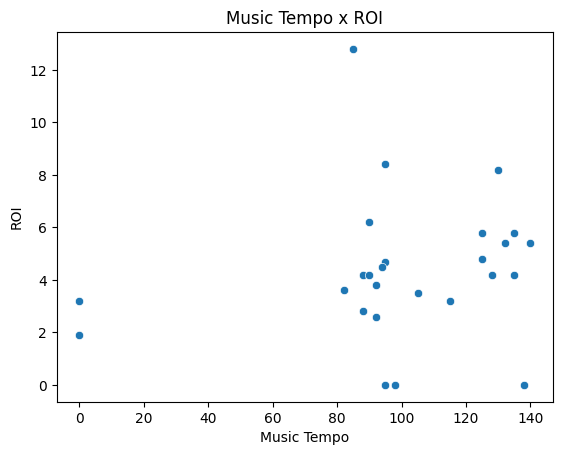

In [146]:
sns.scatterplot(data=df.loc[df['ad_type'].isin(['Video', 'Story'])], x='music_tempo', y='roi')
plt.title("Music Tempo x ROI")
plt.xlabel("Music Tempo")
plt.ylabel("ROI")
plt.show()

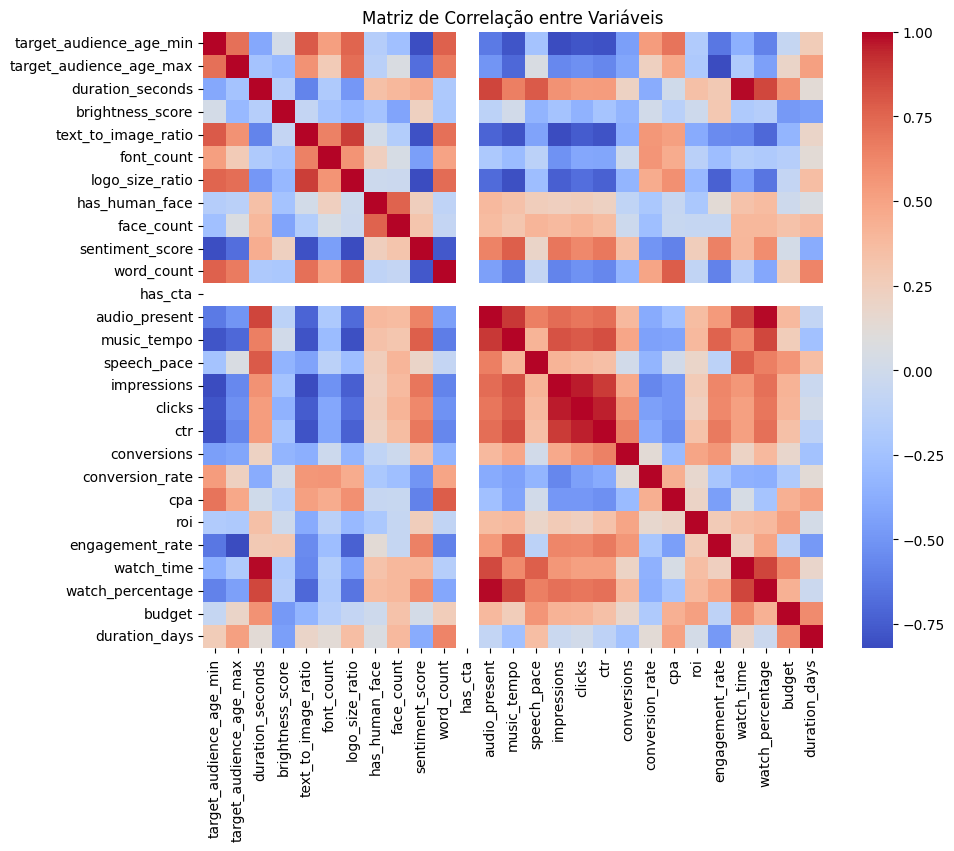

In [147]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

- Watch time and Duration have a strong Correlation
- Sentiment score have medium-strong positive correlations with audio/music features
- Impressions, clicks and CTR have a strong correlation between them. Indicating that they might mean the same thing
- Budged does not correlate with the success of an ad

## Feature Engineering

#### Feature selection
- platform, ad_type, industry, campaign_objetive, target_audience_gender, duration_seconds, aspect_ratio, brightness_score, color_palette_primary,
- text_to_image_ratio, logo_size_ratio, has_human_face, face_count, sentiment_score, word_count, has_cta, music_tempo, speech_pace 

platform, ad_type, industry, campaing_objetive and target_audience_gender were selected to provide campaign context for the predictive model

duration_seconds, aspect_ratio, brightness_score, color_palette_primary, text_to_image_ratio, logo_size_ratio, has_human_face, face_count were selected to provide visual and creative features to the model

sentiment_score, word_count, has_cta, music_tempo, speech_pace were selected to provide textual and emotional features to the model

Other features, e.g. budget, duration_days, start_date and geographic_target doesn't seem relevant for now

In [148]:
df_features = df[['platform', 'ad_type', 'industry', 'campaign_objective', 'target_audience_gender', 
                  'duration_seconds', 'aspect_ratio', 'brightness_score', 'color_palette_primary',
                  'text_to_image_ratio', 'logo_size_ratio', 'has_human_face', 'face_count',
                  'sentiment_score', 'word_count', 'cta_type', 'music_tempo', 'speech_pace',
                  'impressions', 'clicks', 'ctr', 'conversions', 'conversion_rate', 'roi']]

In [149]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [150]:
rgb_values = df_features['color_palette_primary'].str.strip('[]').str.split(',', expand=True).astype(int)

In [151]:
df_features['color_palette_primary_R'] = rgb_values[0]
df_features['color_palette_primary_G'] = rgb_values[1]
df_features['color_palette_primary_B'] = rgb_values[2]

In [152]:
df_features.iloc[0]

platform                          Meta
ad_type                          Image
industry                        Retail
campaign_objective          Conversion
target_audience_gender          female
duration_seconds                     0
aspect_ratio                       1:1
brightness_score                    68
color_palette_primary      [245,40,36]
text_to_image_ratio               0.25
logo_size_ratio                   0.08
has_human_face                    True
face_count                           1
sentiment_score                   0.65
word_count                          18
cta_type                      Shop Now
music_tempo                        0.0
speech_pace                        0.0
impressions                      15682
clicks                             423
ctr                             0.0269
conversions                         32
conversion_rate                 0.0756
roi                                2.4
color_palette_primary_R            245
color_palette_primary_G  

In [153]:
df_features.drop(columns=['color_palette_primary'], inplace=True)

In [154]:
categorial_columns = df_features.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorial_columns:
    le = LabelEncoder()
    df_features[col + '_encoded'] = le.fit_transform(df_features[col])
    label_encoders[col] = le

df_features.drop(columns=categorial_columns, inplace=True)
df_features.head()

,duration_seconds,brightness_score,text_to_image_ratio,logo_size_ratio,has_human_face,face_count,sentiment_score,word_count,music_tempo,speech_pace,...,color_palette_primary_R,color_palette_primary_G,color_palette_primary_B,platform_encoded,ad_type_encoded,industry_encoded,campaign_objective_encoded,target_audience_gender_encoded,aspect_ratio_encoded,cta_type_encoded
0,0,68,0.25,0.08,True,1,0.65,18,0.0,0.0,...,245,40,36,1,1,17,3,1,1,17
1,28,72,0.15,0.05,True,1,0.82,12,115.0,145.0,...,200,180,255,2,3,2,2,0,4,11
2,0,55,0.35,0.12,True,2,0.28,35,0.0,0.0,...,30,50,120,0,1,1,4,0,0,14
3,15,48,0.08,0.06,True,3,0.67,22,95.0,135.0,...,20,20,20,3,3,7,1,0,0,21
4,0,75,0.18,0.07,False,0,0.42,14,0.0,0.0,...,255,255,255,1,0,4,3,0,1,17


In [155]:
df_features['has_human_face'] = df_features['has_human_face'].astype(int)
# df_features['has_cta'] = df_features['has_cta'].astype(int)

In [156]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   duration_seconds                50 non-null     int64  
 1   brightness_score                50 non-null     int64  
 2   text_to_image_ratio             50 non-null     float64
 3   logo_size_ratio                 50 non-null     float64
 4   has_human_face                  50 non-null     int32  
 5   face_count                      50 non-null     int64  
 6   sentiment_score                 50 non-null     float64
 7   word_count                      50 non-null     int64  
 8   music_tempo                     50 non-null     float64
 9   speech_pace                     50 non-null     float64
 10  impressions                     50 non-null     int64  
 11  clicks                          50 non-null     int64  
 12  ctr                             50 non

C:\Users\jonas\AppData\Local\Temp\ipykernel_20912\262006964.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


<Axes: title={'center': 'Feature Correlation with ROI'}, ylabel='None'>

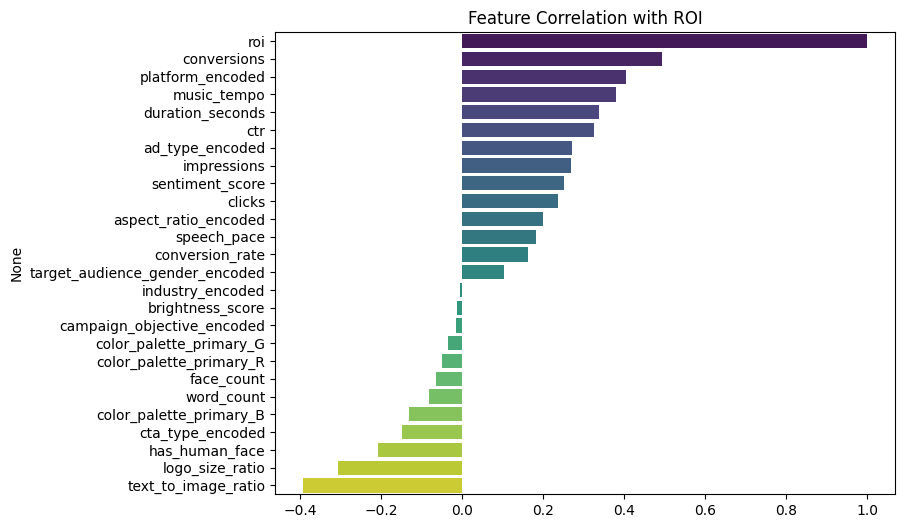

In [157]:
# target_columns = ['impressions', 'clicks', 'ctr', 'conversions', 'conversion_rate']

correlations = df_features.corr()['roi'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.title(f'Feature Correlation with ROI')
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')

C:\Users\jonas\AppData\Local\Temp\ipykernel_20912\1343198142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


<Axes: title={'center': 'Feature Correlation with ctr'}, ylabel='None'>

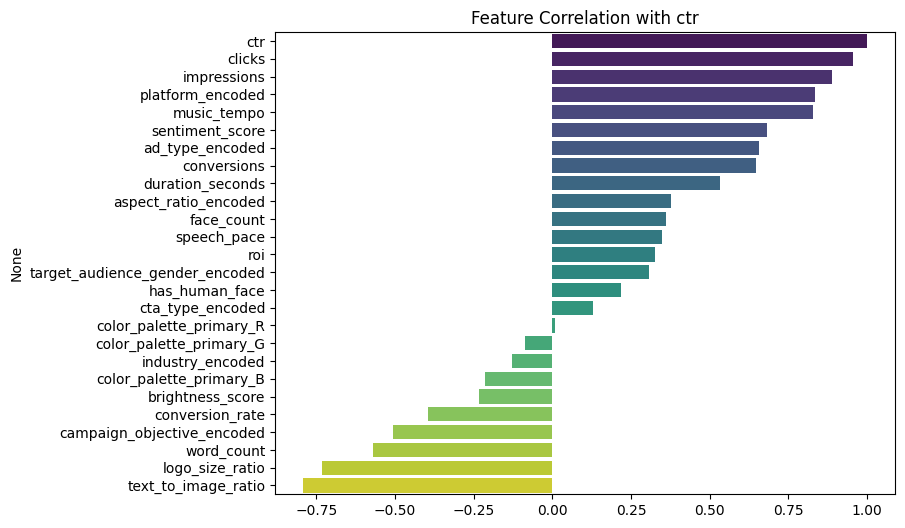

In [158]:
correlations = df_features.corr()['ctr'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.title(f'Feature Correlation with ctr')
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')

C:\Users\jonas\AppData\Local\Temp\ipykernel_20912\3739105215.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


<Axes: title={'center': 'Feature Correlation with conversions'}, ylabel='None'>

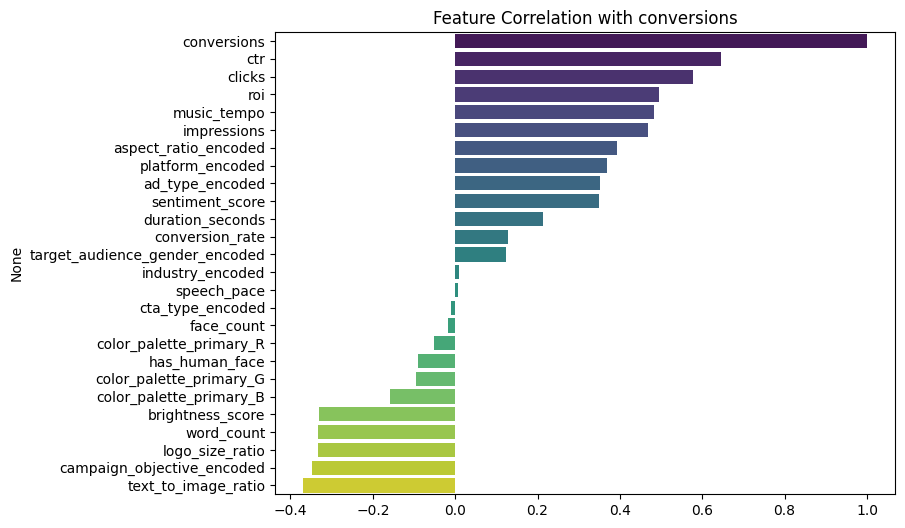

In [159]:
correlations = df_features.corr()['conversions'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.title(f'Feature Correlation with conversions')
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')

- The industry have weak correlations with the targets
- Some features are more important for some target, but have weak correlations with other targets
- e.g. campaing_objetive with ROI and CTR
- text_to_image_ratio and music_tempo have strong correlation with all targets

In [160]:
df_features.to_csv("sample_feature_engineered.csv", index=False)

In [161]:
import joblib

joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']